# **<p style="color:Blue;">About The Dataset :</p>**
    
age: Age of the patient

sex: Sex of the patient

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

***Reading The Dataset***

In [ ]:
heart=pd.read_csv('/content/heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


***Checking the shape of DataFrame***

In [ ]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 303 and number of columns are  14


***Checking for null values***

In [ ]:
heart.isnull().sum()/len(heart)*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

**No null values found**

***Checking For datatypes of the attributes***

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**All attributes are of type 'int' except 'oldpeak'**

***Checking for duplicate rows***

In [ ]:
heart[heart.duplicated()]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


***Removing the duplicates***

In [ ]:
heart.drop_duplicates(keep='first',inplace=True)

**Checking new shape**

In [ ]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 302 and number of columns are  14


# Pandas Profiling

In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# import pandas_profiling as pp
# pp.ProfileReport(heart)

# ***Data Visualization***

***Breakdown for chest pain***

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


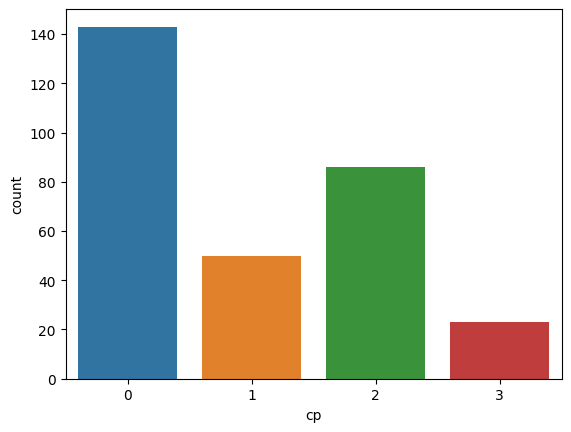

In [ ]:
x=(heart.cp.value_counts())
print(x)
p = sns.countplot(data=heart, x="cp")
plt.show()

1. It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.
2. It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest
3. It can also be observed people with chest pain of type 0 is almost 50% of all the people.

***Breakdown of ECG***

1    151
0    147
2      4
Name: restecg, dtype: int64


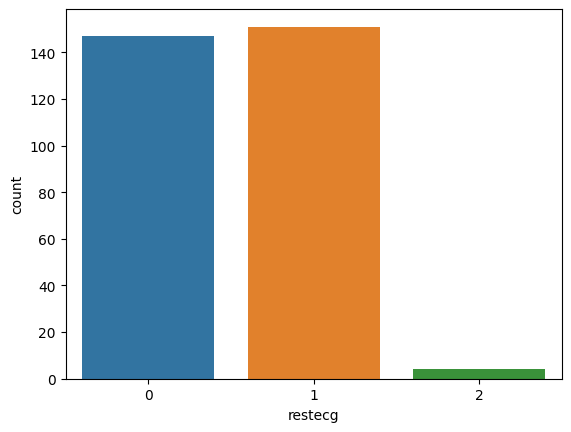

In [ ]:
x=(heart.restecg.value_counts())
print(x)
p = sns.countplot(data=heart, x="restecg")
plt.show()



ECG count is almost the same for type 0 and 1. Also, for type 2 its almost negligible in comparision to type 0 and 1.

***Breakdown for Exercise Induced Angina***

0    203
1     99
Name: exng, dtype: int64


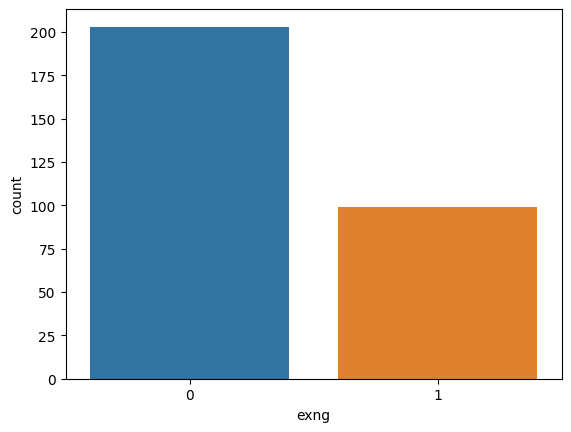

In [ ]:
x=(heart.exng.value_counts())
print(x)
p = sns.countplot(data=heart, x="exng")
plt.show()


***EXNG count is more than double for type 0***

***Breakdown for Thalium Stress Test***

2    165
3    117
1     18
0      2
Name: thall, dtype: int64


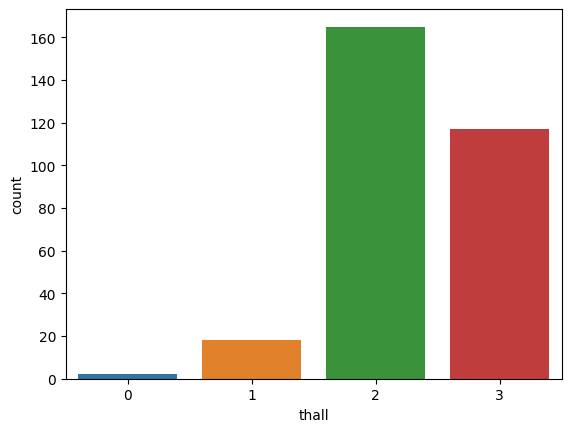

In [ ]:
x=(heart.thall.value_counts())
print(x)
p = sns.countplot(data=heart, x="thall")
plt.show()


***Thall count is max for type 2 and min for type 0.***

***Heart Disease Vs Age***

<ipython-input-15-e59505fab682>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,)
<ipython-input-15-e59505fab682>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)


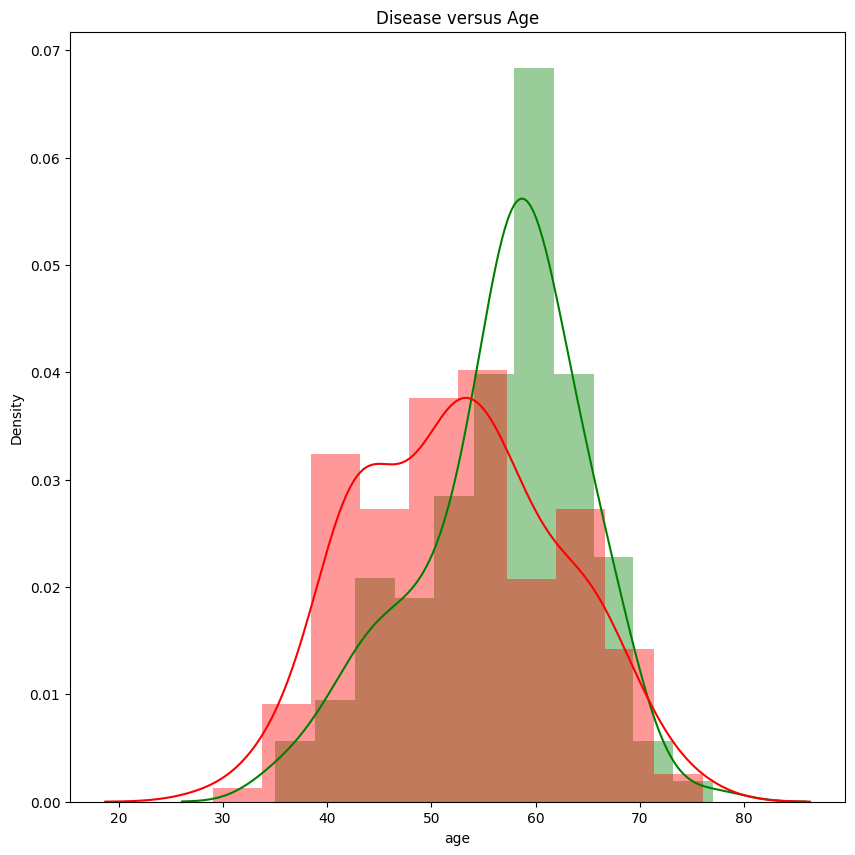

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)
plt.title('Disease versus Age')
plt.show()



<ipython-input-16-7946f131d8a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,)
<ipython-input-16-7946f131d8a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)


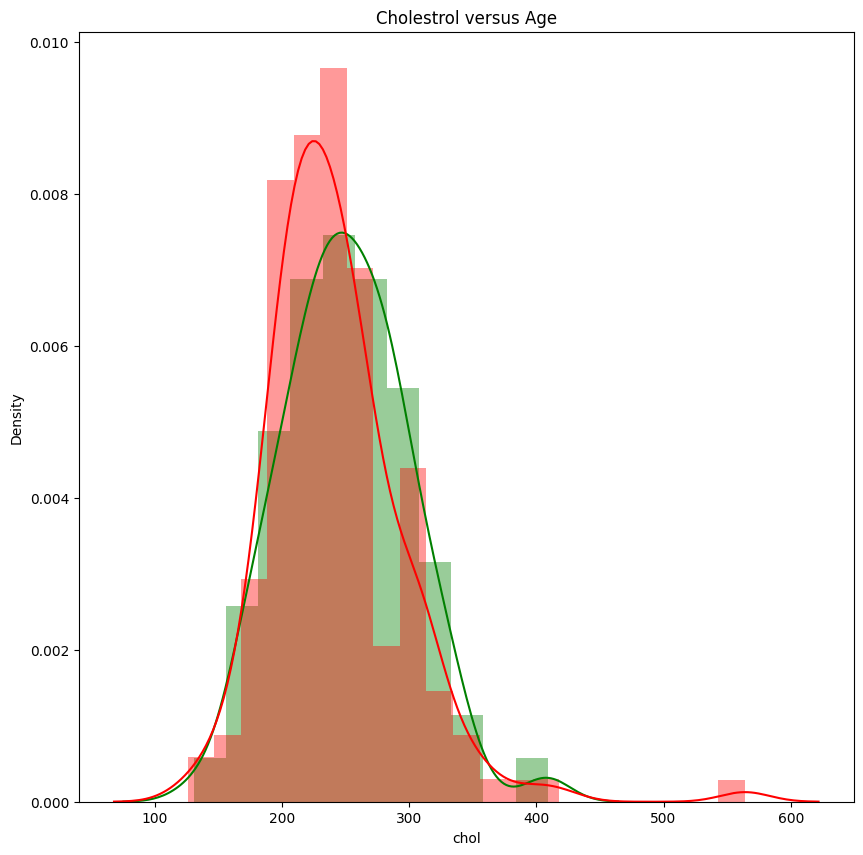

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()


***Pair Plot***

In [ ]:
# plt.figure(figsize=(20,20))
# sns.pairplot(heart)
# plt.show()

***Violin Plot***

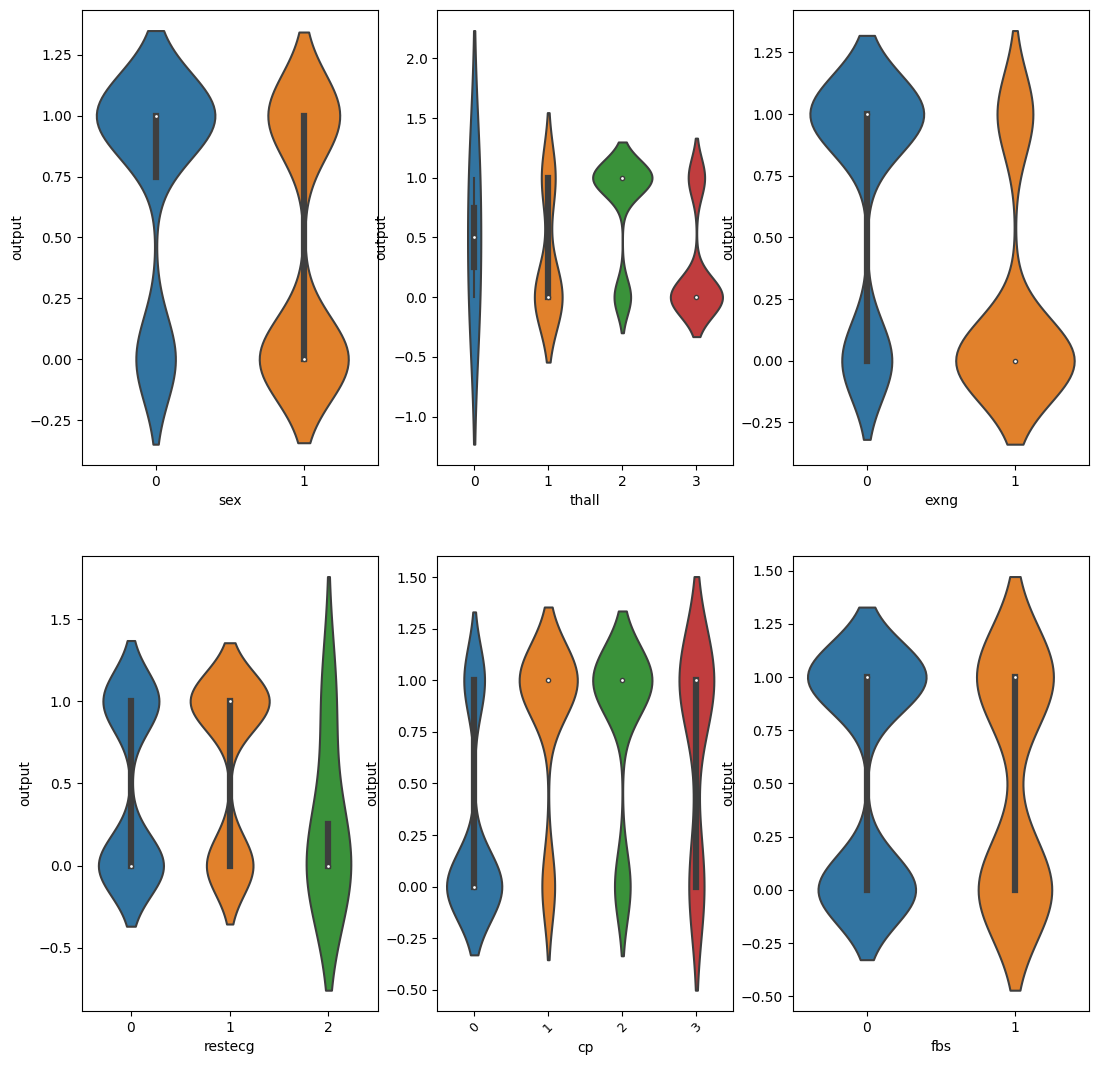

In [ ]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = heart)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = heart)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = heart)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = heart)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = heart)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = heart)

plt.show()

# **Data preprocessing**

**There's no need for categorical encoding**

In [ ]:
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

**Splitting the dataset into training and testing data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [ ]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (241, 12) (241,)
Shape for testing data (61, 12) (61,)


**Feature Scaling**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train,x_test

(array([[-1.4186261 ,  0.98544689, -0.55988902, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [-1.4186261 ,  0.98544689,  0.81698091, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.70490738,  0.98544689,  0.47276343, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.70490738,  1.94307874, -0.67462818, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [ 0.70490738,  0.98544689,  0.35802427, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.70490738,  0.98544689,  0.01380679, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.70490738,  0.02781503, -0.67462818,  0.65089023, -0.40527917,
         -0.97525383, -1.96657306, -0.6983225 ,  0.27236593, -0.61492051,
          0.29516791,  1.1478345 ],
        [ 0.70490738,  1.94307874,  2.19385084, -0.36856884, -0.40527917,
         -0.97525383,  0.23525787, -0.6983225 , -0.39657867, -0.61492051,
         -0.70674006,  1.1478345 ],
     

Epoch 1/50
16/16 [==============================] - 11s 63ms/step - loss: 0.6758 - accuracy: 0.6281 - val_loss: 0.6272 - val_accuracy: 0.7869
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5792 - accuracy: 0.8347 - val_loss: 0.5123 - val_accuracy: 0.8525
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.4660 - accuracy: 0.8430 - val_loss: 0.4108 - val_accuracy: 0.8525
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.3894 - accuracy: 0.8347 - val_loss: 0.3739 - val_accuracy: 0.8525
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 0.3573 - accuracy: 0.8388 - val_loss: 0.3733 - val_accuracy: 0.8525
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.3459 - accuracy: 0.8471 - val_loss: 0.3805 - val_accuracy: 0.8361
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.3368 - accuracy: 0.8471 - val_loss: 0.3666 - val_accuracy: 0.8525
Epoch 8/50
16/16 [

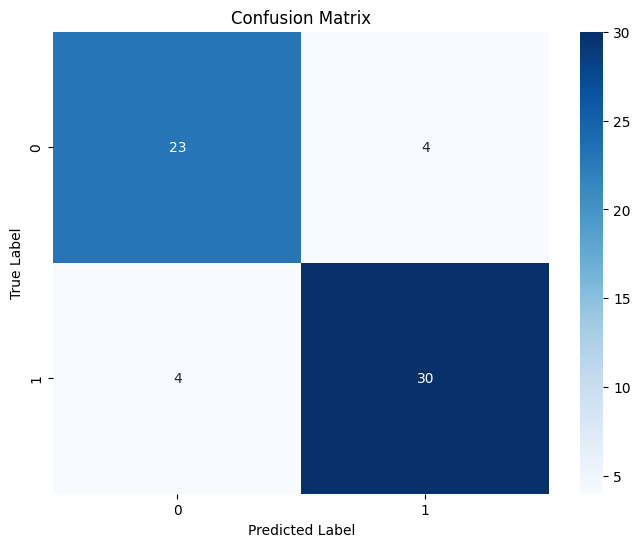

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
heart = pd.read_csv('/content/heart.csv')

# Separate features and target variable
X = heart.drop('output', axis=1).values
y = heart['output'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape the input for the RNN model
X = X.reshape(X.shape[0], 1, X.shape[1])

# Convert the target variable to categorical (if needed)
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the GRU model
model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(1, X.shape[2])))
model.add(GRU(32))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Epoch 1/50
16/16 [==============================] - 9s 137ms/step - loss: 0.6491 - accuracy: 0.7231 - val_loss: 0.5326 - val_accuracy: 0.8525
Epoch 2/50
16/16 [==============================] - 0s 18ms/step - loss: 0.4662 - accuracy: 0.8223 - val_loss: 0.3836 - val_accuracy: 0.8689
Epoch 3/50
16/16 [==============================] - 0s 18ms/step - loss: 0.3866 - accuracy: 0.8388 - val_loss: 0.3514 - val_accuracy: 0.8361
Epoch 4/50
16/16 [==============================] - 0s 13ms/step - loss: 0.3694 - accuracy: 0.8471 - val_loss: 0.3439 - val_accuracy: 0.8525
Epoch 5/50
16/16 [==============================] - 0s 13ms/step - loss: 0.3641 - accuracy: 0.8471 - val_loss: 0.3413 - val_accuracy: 0.8525
Epoch 6/50
16/16 [==============================] - 0s 10ms/step - loss: 0.3561 - accuracy: 0.8471 - val_loss: 0.3322 - val_accuracy: 0.8689
Epoch 7/50
16/16 [==============================] - 0s 12ms/step - loss: 0.3491 - accuracy: 0.8471 - val_loss: 0.3399 - val_accuracy: 0.8525
Epoch 8/50
1

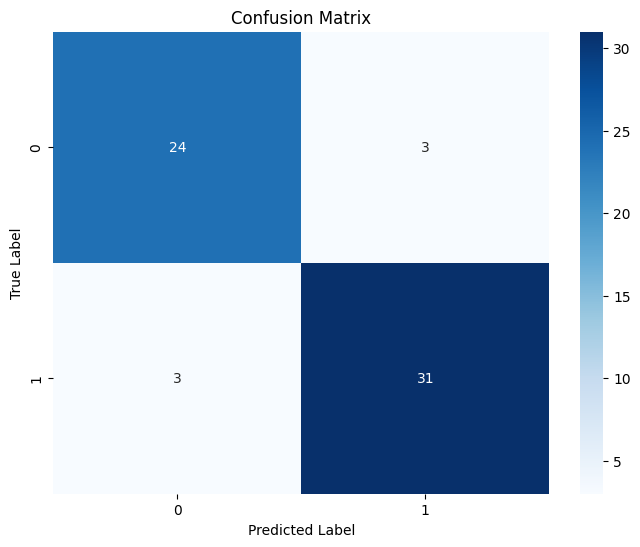

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
heart = pd.read_csv('/content/heart.csv')

# Separate features and target variable
X = heart.drop('output', axis=1).values
y = heart['output'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape the input for the RNN model
X = X.reshape(X.shape[0], 1, X.shape[1])

# Convert the target variable to categorical (if needed)
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the stacked GRU model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape=(1, X.shape[2])))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Epoch 1/48
16/16 [==============================] - 11s 109ms/step - loss: 0.5466 - accuracy: 0.7562 - val_loss: 0.4215 - val_accuracy: 0.8361
Epoch 2/48
16/16 [==============================] - 0s 14ms/step - loss: 0.4220 - accuracy: 0.8264 - val_loss: 0.3475 - val_accuracy: 0.8525
Epoch 3/48
16/16 [==============================] - 0s 13ms/step - loss: 0.3469 - accuracy: 0.8471 - val_loss: 0.3681 - val_accuracy: 0.8689
Epoch 4/48
16/16 [==============================] - 0s 12ms/step - loss: 0.3626 - accuracy: 0.8388 - val_loss: 0.3485 - val_accuracy: 0.8525
Epoch 5/48
16/16 [==============================] - 0s 11ms/step - loss: 0.3502 - accuracy: 0.8223 - val_loss: 0.3381 - val_accuracy: 0.8525
Epoch 6/48
16/16 [==============================] - 0s 13ms/step - loss: 0.3330 - accuracy: 0.8636 - val_loss: 0.3306 - val_accuracy: 0.8852
Epoch 7/48
16/16 [==============================] - 0s 12ms/step - loss: 0.3243 - accuracy: 0.8554 - val_loss: 0.3792 - val_accuracy: 0.8361
Epoch 8/48


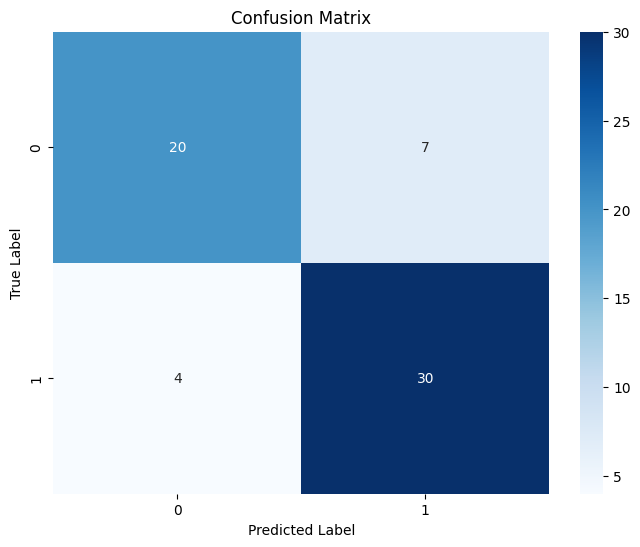

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
heart = pd.read_csv('/content/heart.csv')

# Separate features and target variable
X = heart.drop('output', axis=1).values
y = heart['output'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape the input for the RNN model
X = X.reshape(X.shape[0], 1, X.shape[1])

# Convert the target variable to categorical (if needed)
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the stacked GRU model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape=(1, X.shape[2])))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
'''
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.005, momentum=0.95)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
'''


from tensorflow.keras.optimizers import Adam

optimizer = Adam(
    learning_rate=0.0005,
    beta_1=0.95,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False
)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Epoch 1/45
16/16 [==============================] - 11s 126ms/step - loss: 0.6780 - accuracy: 0.6901 - val_loss: 0.6573 - val_accuracy: 0.8033
Epoch 2/45
16/16 [==============================] - 0s 15ms/step - loss: 0.6227 - accuracy: 0.8264 - val_loss: 0.5891 - val_accuracy: 0.8361
Epoch 3/45
16/16 [==============================] - 0s 13ms/step - loss: 0.5389 - accuracy: 0.8264 - val_loss: 0.4931 - val_accuracy: 0.8361
Epoch 4/45
16/16 [==============================] - 0s 13ms/step - loss: 0.4556 - accuracy: 0.8264 - val_loss: 0.4271 - val_accuracy: 0.8361
Epoch 5/45
16/16 [==============================] - 0s 12ms/step - loss: 0.3974 - accuracy: 0.8223 - val_loss: 0.3801 - val_accuracy: 0.8361
Epoch 6/45
16/16 [==============================] - 0s 11ms/step - loss: 0.3693 - accuracy: 0.8430 - val_loss: 0.3702 - val_accuracy: 0.8689
Epoch 7/45
16/16 [==============================] - 0s 12ms/step - loss: 0.3593 - accuracy: 0.8430 - val_loss: 0.3680 - val_accuracy: 0.8361
Epoch 8/45


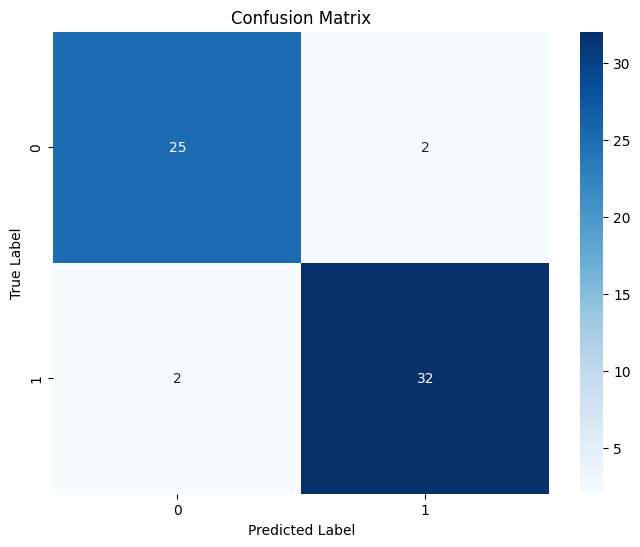

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
heart = pd.read_csv('/content/heart.csv')

# Separate features and target variable
X = heart.drop('output', axis=1).values
y = heart['output'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape the input for the RNN model
X = X.reshape(X.shape[0], 1, X.shape[1])

# Convert the target variable to categorical
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the stacked GRU model with selective dropout
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape=(1, X.shape[2])))
#model.add(Dropout(0.1))  # Dropout after the first GRU layer
model.add(GRU(64, return_sequences=True))
#model.add(Dropout(0.1))  # Dropout after the second GRU layer
model.add(GRU(32))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
from tensorflow.keras.optimizers import Adam

optimizer = Adam(
    learning_rate=0.0005,
    beta_1=0.95,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False
)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=45, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
!pip install scikit-plot


Accuracy: 93.44%
Confusion Matrix:
[[25  2]
 [ 2 32]]


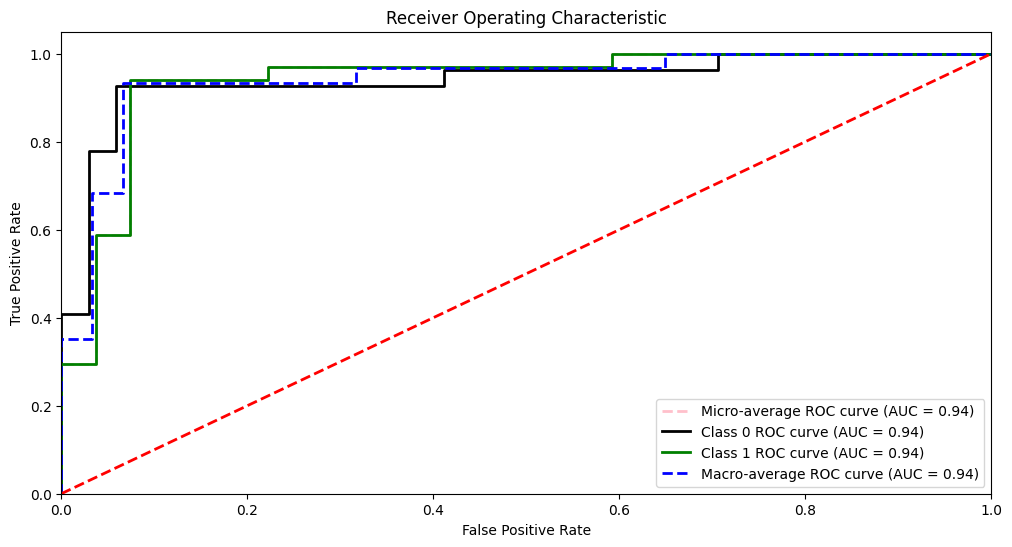

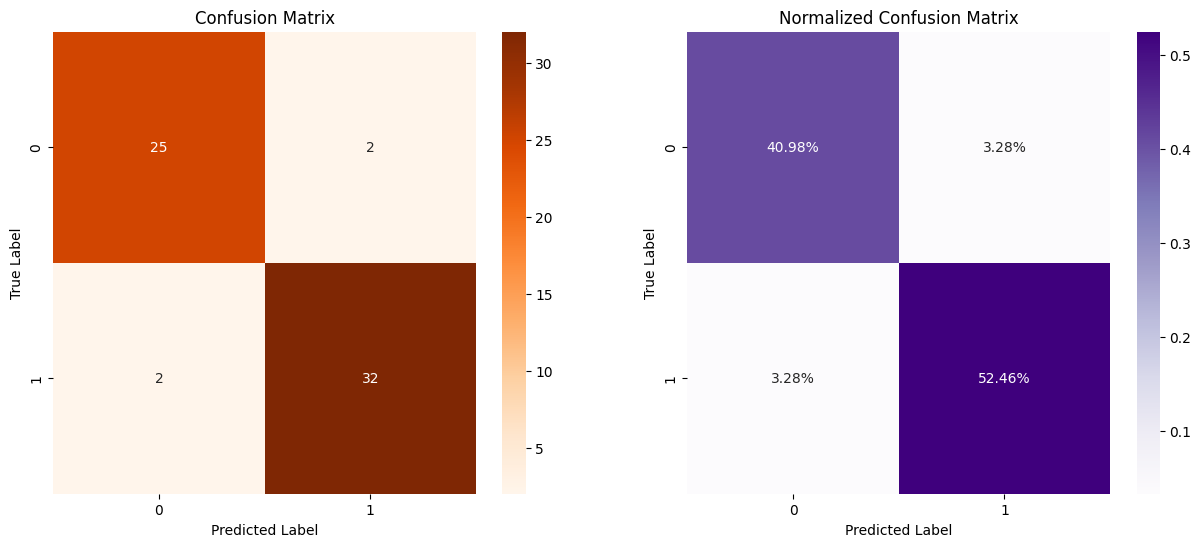

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_test_classes, y_pred[:, 1], pos_label=1)
roc_auc_micro = auc(fpr_micro, tpr_micro)

fpr_macro = dict()
tpr_macro = dict()
roc_auc_macro = dict()

for i in range(2):
    fpr_macro[i], tpr_macro[i], _ = roc_curve(y_test_classes, y_pred[:, i], pos_label=i)
    roc_auc_macro[i] = auc(fpr_macro[i], tpr_macro[i])

# Calculate macro-average ROC curve
fpr_macro_avg = np.array([fpr_macro[i] for i in range(2)]).mean(axis=0)
tpr_macro_avg = np.array([tpr_macro[i] for i in range(2)]).mean(axis=0)
roc_auc_macro_avg = auc(fpr_macro_avg, tpr_macro_avg)

# Plot ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_micro, tpr_micro, color='pink', linestyle='--', lw=2, label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc_micro))
plt.plot(fpr_macro[0], tpr_macro[0], color='black', lw=2, label='Class 0 ROC curve (AUC = {:.2f})'.format(roc_auc_macro[0]))
plt.plot(fpr_macro[1], tpr_macro[1], color='green', lw=2, label='Class 1 ROC curve (AUC = {:.2f})'.format(roc_auc_macro[1]))
plt.plot(fpr_macro_avg, tpr_macro_avg, color='blue', linestyle='--', lw=2, label='Macro-average ROC curve (AUC = {:.2f})'.format(roc_auc_macro_avg))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Oranges", ax=ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted Label")
ax1.set_ylabel("True Label")

ax2 = fig.add_subplot(122)
sns.heatmap(confusion_mat/np.sum(confusion_mat), annot=True, fmt=".2%", cmap="Purples", ax=ax2)
ax2.set_title("Normalized Confusion Matrix")
ax2.set_xlabel("Predicted Label")
ax2.set_ylabel("True Label")

plt.show()


Accuracy: 93.44%
Confusion Matrix:
[[25  2]
 [ 2 32]]


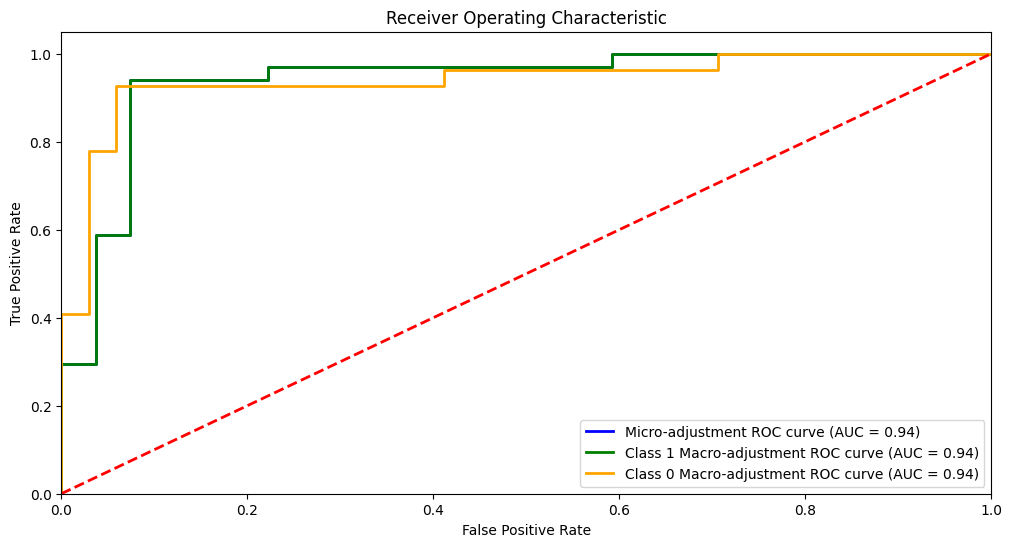

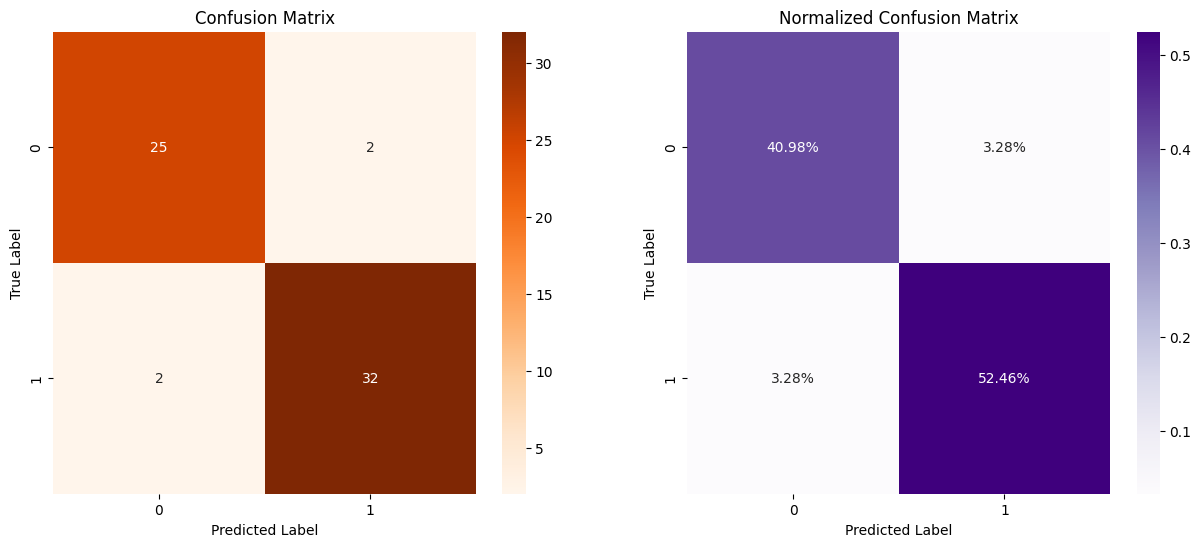

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_test_classes, y_pred[:, 1], pos_label=1)
roc_auc_micro = auc(fpr_micro, tpr_micro)

fpr_macro = dict()
tpr_macro = dict()
roc_auc_macro = dict()

for i in range(2):
    fpr_macro[i], tpr_macro[i], _ = roc_curve(y_test_classes, y_pred[:, i], pos_label=i)
    roc_auc_macro[i] = auc(fpr_macro[i], tpr_macro[i])

# Plot ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_micro, tpr_micro, color='blue', lw=2, label='Micro-adjustment ROC curve (AUC = {:.2f})'.format(roc_auc_micro))
plt.plot(fpr_macro[1], tpr_macro[1], color='green', lw=2, label='Class 1 Macro-adjustment ROC curve (AUC = {:.2f})'.format(roc_auc_macro[1]))
plt.plot(fpr_macro[0], tpr_macro[0], color='orange', lw=2, label='Class 0 Macro-adjustment ROC curve (AUC = {:.2f})'.format(roc_auc_macro[0]))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Oranges", ax=ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted Label")
ax1.set_ylabel("True Label")

ax2 = fig.add_subplot(122)
sns.heatmap(confusion_mat/np.sum(confusion_mat), annot=True, fmt=".2%", cmap="Purples", ax=ax2)
ax2.set_title("Normalized Confusion Matrix")
ax2.set_xlabel("Predicted Label")
ax2.set_ylabel("True Label")

plt.show()

**1. Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[23  4]
 [ 3 31]]


The accuracy of Logistic Regression is :  88.52459016393442 %


In [ ]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

ModuleNotFoundError: ignored

In [ ]:
Y_test_probs = model.predict_proba(x_test)

plot_roc(y_test, Y_test_probs, title="Logistic Regression", figsize=(12,6));

In [ ]:
# !pip install scikit-plot
import scikitplot as skplt

Y_test_pred = predicted

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);


ModuleNotFoundError: ignored

**2.Gaussian Naive Bayes**

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

In [ ]:
Y_test_probs = model.predict_proba(x_test)

plot_roc(y_test, Y_test_probs,
                       title="Gaussian Naive Bayes", figsize=(12,6));

In [ ]:
# !pip install scikit-plot
import scikitplot as skplt

Y_test_pred = predicted

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);


**3.Bernoulli Naive Bayes**

In [ ]:
model = BernoulliNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print("The accuracy of Bernoulli Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

* True Positive + True Negative : 54
* False Positive + False Negative : 7

In [ ]:
Y_test_probs = model.predict_proba(x_test)

plot_roc(y_test, Y_test_probs,
                       title="Bernoulli Naive Bayes", figsize=(12,6));

In [ ]:
# !pip install scikit-plot
import scikitplot as skplt

Y_test_pred = predicted

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);


**4.Support Vector Machine**

In [ ]:
model = SVC(probability=True)
model.fit(x_train, y_train)

predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")



In [ ]:
Y_test_probs = model.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Support Vector Classifer (SVC)", figsize=(12,6));

In [ ]:
# !pip install scikit-plot
import scikitplot as skplt

Y_test_pred = predicted

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);


**5.Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")


**6.K Nearest Neighbours**

In [ ]:

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)
predicted = model.predict(x_test)


print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")




In [ ]:
Y_test_probs = model.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="KNN", figsize=(12,6));

In [ ]:
# !pip install scikit-plot
import scikitplot as skplt

Y_test_pred = predicted

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);


**Optimizing the KNN**

In [ ]:
error_rate = []

for i in range(1, 40):

    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



With k=7 as it hovers after that

In [ ]:
model = KNeighborsClassifier(n_neighbors = 7)

model.fit(x_train, y_train)
predicted = model.predict(x_test)

print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


In [ ]:
Y_test_probs = model.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Optimized KNN", figsize=(12,6));

In [ ]:
# !pip install scikit-plot
import scikitplot as skplt

Y_test_pred = predicted

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);


**7.X Gradient Boosting**

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)

predicted = model.predict(x_test)

cm = confusion_matrix(y_test, predicted)
print(cm)
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")


In [ ]:
Y_test_probs = model.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="XGBoost", figsize=(12,6));

In [ ]:
# !pip install scikit-plot
import scikitplot as skplt

Y_test_pred = predicted

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);


**8.MLP PSO**

In [ ]:
from PSOMLP import PSOMLP

n = 200
i = 5
# generate random dataset
x = np.random.normal(-1, 1, size=(n, i))
# the class is defined by a real function applied to x
y = np.array([1 if sum(a) >= 1 else 0 for a in x])

pso = PSOMLP(hlayers=(10,))
mlp = pso.fit(x, y, iterations=100)
print("Accuracy for trainning data:", 100 * mlp.score(x, y))

mlp = pso.fit(x_train, y_train, iterations=100)
print("Accuracy for testing data:", 100 * mlp.score(x_test, y_test))

In [ ]:
plt.style.use('fivethirtyeight')
# plot histograms for each variable
heart.hist(figsize = (18, 12))
plt.show()

**Neural Network**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

In [ ]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=42),
               GaussianNB(), BernoulliNB(), SVC(probability=True),
               KNeighborsClassifier(n_neighbors=7),
               RandomForestClassifier(random_state=42),
               xgb.XGBClassifier(use_label_encoder=False)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    yproba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


In [ ]:
import matplotlib.pyplot as plot

plot.plot(['Log Reg', 'SVM'])
plot.plot([88.5, 91.8])
plot.title('model accuracy')
plot.ylabel('accuracy')

 # **Conclusion**

1. Most of the models are performing really well.
2. SVM is performing the best for the given dataset.